<a href="https://colab.research.google.com/github/VishnuReddy25/SECOND-MIND/blob/main/Vishnu_Second_Mind.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LANGGRAPH_PIPELINE/ARCHITECTURE**

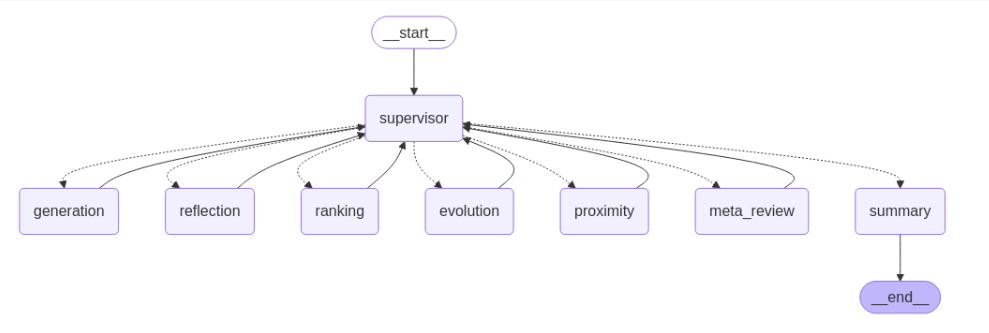

**NOTE :**

1) The average time taken to run a query, performing 2-3 cycles/iterations, is around 200 seconds.

2) If there is any error while generating the output, it may be due to a failure in the API call from Tavily. Please kindly re-run the cell.


**Queries that we have tested :**           

Artificial General Intelligence (AGI)

1) How to build causality reasoning in Artificial general intelligence models.

2) Once causality reasoning is integrated into AGI models, how can it be leveraged to enhance out-of-distribution generalization and decision-making in real-world scenarios?

Quantum Learning

1) How can quantum support vector machines (QSVMs) provide a computational advantage over classical SVMs in high-dimensional data classification?

2) If QSVMs demonstrate quantum speedup, what challenges arise in scaling them to large real-world datasets, and how can quantum error correction help?

Machine Unlearning

1) What are the main challenges in designing efficient data removal techniques in deep neural networks without retraining from scratch?

2) Given existing unlearning methods like approximate influence functions, how can federated learning systems ensure compliance with privacy regulations while maintaining performance?

Sustainable Software Design

1) How can energy-efficient programming languages and frameworks help reduce carbon footprints in large-scale computing applications?

2) If energy-efficient programming is adopted, what strategies can be used to optimize cloud-based AI workloads for further sustainability?

Common Sense Reasoning in Agentic AI

1) How can large language models be enhanced with external knowledge graphs to improve common sense reasoning in autonomous agents?

2) Once integrated with knowledge graphs, what techniques can help these agents resolve contradictions and inconsistencies in their reasoning?

# Installing Dependencies

In [ ]:
!pip install chromadb -q
!pip install -q langchain_google_genai langchain_core
!pip install -q langchain_community
!pip install duckduckgo-search -q
%pip install --quiet langgraph

In [ ]:
!pip install arxiv tavily-python -q

In [ ]:
!pip install -q rank_bm25

# Setup & Configuration

In [ ]:
from google.colab import userdata
GEMINI_API_KEY=userdata.get("GOOGLE_API_KEY")
from langchain_google_genai import ChatGoogleGenerativeAI

llm=ChatGoogleGenerativeAI(model="gemini-1.5-flash",api_key=GEMINI_API_KEY,temperature=0.3)
from langchain_core.messages import HumanMessage, AIMessage
import os
from langchain_community.tools import DuckDuckGoSearchRun
duck_search=DuckDuckGoSearchRun(backend="auto",max_results=5)

# Setting up VectorDB

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import chromadb
from sentence_transformers import SentenceTransformer
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

DB_PATH = "/content/drive/MyDrive/chroma_db"

chroma_client = chromadb.PersistentClient(path=DB_PATH)

collection = chroma_client.get_or_create_collection(name="summary_collection")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


# Setting up Redis Server

In [ ]:
!pip install redis -q

In [ ]:
!apt-get update
!apt-get install redis-server
!redis-server --daemonize yes
!redis-cli ping

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

In [ ]:
import numpy as np
from sentence_transformers import SentenceTransformer

In [ ]:
import redis
import hashlib
import json
from typing import Optional
import time
import logging

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

In [ ]:
import redis
import time
import logging
import socket
import sys

def diagnose_redis_connection(hosts=['localhost', '127.0.0.1'], port=6379, max_retries=3):
    logging.basicConfig(level=logging.INFO)
    logger = logging.getLogger(__name__)

    def is_port_open(host, port):
        try:
            sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
            sock.settimeout(5)
            result = sock.connect_ex((host, port))
            sock.close()
            return result == 0
        except Exception as e:
            logger.error(f"Port check error for {host}:{port} - {e}")
            return False

    for host in hosts:
        logger.info(f"Attempting to connect to Redis at {host}:{port}")

        if not is_port_open(host, port):
            logger.warning(f"Port {port} is not open on {host}")
            continue

        for attempt in range(max_retries):
            try:
                client = redis.Redis(
                    host=host,
                    port=port,
                    db=0,
                    decode_responses=True,
                    socket_connect_timeout=5,
                    socket_timeout=5
                )

                client.ping()
                logger.info(f"Successfully connected to Redis at {host}:{port}")
                return client

            except redis.ConnectionError as e:
                logger.warning(f"Redis connection attempt {attempt+1}/{max_retries} failed for {host}: {e}")

                if attempt < max_retries - 1:
                    time.sleep(1)

        logger.info("Running system-level diagnostics...")

        try:
            import subprocess

            if sys.platform.startswith('linux'):
                process_check = subprocess.run(['ps', 'aux'], capture_output=True, text=True)
                redis_running = 'redis-server' in process_check.stdout
            elif sys.platform == 'darwin':
                process_check = subprocess.run(['ps', 'aux'], capture_output=True, text=True)
                redis_running = 'redis-server' in process_check.stdout
            elif sys.platform == 'win32':
                process_check = subprocess.run(['tasklist'], capture_output=True, text=True)
                redis_running = 'redis-server.exe' in process_check.stdout
            else:
                redis_running = False

            logger.info(f"Redis process running: {redis_running}")

        except Exception as sys_error:
            logger.error(f"Failed to check Redis process: {sys_error}")

    logger.error("Could not establish Redis connection after all attempts")
    return None

def get_robust_redis_connection():
    try:
        redis_client = diagnose_redis_connection()

        if redis_client:
            try:
                redis_client.set('connection_test', 'successful')
                redis_client.delete('connection_test')
                return redis_client
            except Exception as write_error:
                logging.error(f"Write test failed: {write_error}")
                return None

        return None

    except Exception as e:
        logging.error(f"Unexpected error in Redis connection: {e}")
        return None

redis_client = get_robust_redis_connection()
CACHE_EXPIRATION = 60 * 60 * 24

In [ ]:
!ps aux | grep redis


root        2395  0.1  0.0  67216  6500 ?        Ssl  12:10   0:21 redis-server *:6379
root       54202  0.0  0.0   7376  3456 ?        S    15:26   0:00 /bin/bash -c ps aux | grep redis
root       54204  0.0  0.0   1212     8 ?        R    15:26   0:00 grep redis


# Utility Functions

In [ ]:
def retrieve_all_data_from_chroma(query: str) -> str:
  all_data = collection.get(include=['documents', 'embeddings', 'metadatas'])

  for i in range(len(all_data["documents"])):
      print(f"**Document {i+1}**")
      print(f"Summary: {all_data['documents'][i]}")
      print(f"Embedding (First 5 values): {all_data['embeddings'][i][:5]}...\n")
      print(f"Metadata: {all_data['metadatas'][i]}\n")

In [ ]:
def clear_cache():
    """Clear all cached LLM responses"""
    keys = redis_client.keys("llm_cache:*") + redis_client.keys("search_cache:*")
    if keys:
        redis_client.delete(*keys)
        print(f"Cleared {len(keys)} cached items")
    else:
        print("Cache already empty")

In [ ]:
import json

def cached_llm_invoke(prompt: str, model_name: Optional[str] = None, variation_level: float = 0.2) -> str:
    """
    Wrapper for LLM invocation that uses Redis for caching but still allows for response variation.
    """
    cache_key = f"llm_cache:{hashlib.md5((prompt + (model_name or 'default')).encode()).hexdigest()}"

    cached_response = redis_client.get(cache_key)
    if cached_response:
        print(f"[CACHE] Hit for prompt: {prompt[:50]}...")

        if variation_level > 0:
            variation_prompt = f"""
            I need a response to the following prompt:

            {prompt}

            Here is a previous response I've given that you can use as reference:

            {cached_response}

            Please provide a response that captures the same information but with {int(variation_level * 100)}% variation
            in wording, structure, or examples. Maintain the same level of accuracy and helpfulness.
            """

            response = llm.invoke(variation_prompt).content
            print(f"[CACHE] Generated variant with {int(variation_level * 100)}% variation level")
            return response
        else:
            return cached_response

    print(f"[CACHE] Miss for prompt: {prompt[:50]}...")
    response = llm.invoke(prompt).content

    try:
        if hasattr(response, 'content'):
            redis_client.set(cache_key, str(response.content), ex=CACHE_EXPIRATION)
        elif isinstance(response, str):
            redis_client.set(cache_key, response, ex=CACHE_EXPIRATION)
        else:
            redis_client.set(cache_key, json.dumps(str(response)), ex=CACHE_EXPIRATION)
    except Exception as e:
        print(f"WARNING:__main__:Failed to write to cache: {e}")

    return response

In [ ]:
from typing import TypedDict , Annotated, List, Optional, Dict, Any
import re
from langgraph.graph import END, StateGraph, START
from langgraph.graph.state import CompiledStateGraph

import random as random

In [ ]:
from operator import add

In [ ]:
class LLMAgentCall(TypedDict):
    query: str
    hypothesis: str
    source_links:List[str]
    evolution_links: List[str]
    feedback: str
    score: int
    refined_hypothesis: str
    memory_refined_output: str
    meta_review_text: str
    last_executed_agent: str
    highest_ranking: str
    loop_count: int
    logs: Annotated[List[str],add]
    next: str


# Building Agents

**SUPERVISOR AGENT**

In [ ]:
"""
This function, supervisor_agent, acts as a controller that decides the next step in a multi-step AI workflow based on the current state. It follows a structured loop through different stages:

  Starts with "generation" if no previous agent has run.

  Moves through "reflection", "ranking", "evolution", and "proximity", adjusting flow based on feedback and scores.

  Loops back to "generation" if necessary, but limits looping to 3 times (llm_decision).

  Ends with cleanup and final summary when conditions are met.
"""


def supervisor_agent(state: dict) -> dict:
    print(f"\n[SUPERVISOR] Deciding next step...")

    last_executed_agent = state.get("last_executed_agent")
    log=state.get("logs",[])

    if last_executed_agent is None:
        return {"next": "generation"}

    elif last_executed_agent == "generation":
        return {"next": "reflection"}

    elif last_executed_agent == "reflection":
        if state.get("feedback") == "yes":
            return {"next": "ranking"}
        else:
            return {"next": "generation", "loop_count": state.get("loop_count", 0) + 1}

    elif last_executed_agent == "ranking":
        score = state.get("score", 0)
        highest_ranking = state.get("highest_ranking", 0)
        if score < highest_ranking:
            return {"next": "generation", "loop_count": state.get("loop_count", 0) + 1}
        else:
            return {"next": "evolution"}

    elif last_executed_agent == "evolution":
        return {"next": "proximity"}

    elif last_executed_agent == "proximity":
        should_loop = llm_decision(state.get("loop_count", 0))
        if should_loop:
            return {"next": "generation", "loop_count": state.get("loop_count", 0) + 1}
        else:
            print(f"[CLEAN UP AGENT] Processing")
            log.append(f"[CLEAN UP AGENT] Processing")
            print(f"Forwarding output")
            log.append(f"Forwarding output")
            return {
            "next": "summary",
            "final_summary": state["memory_refined_output"]
            }

    else:
        return {"next": "summary"}

def llm_decision(loop_count):
    if loop_count >= 2:
        return False
    else:
        return True


**GENERATION AGENT**

In [ ]:
"""
This function retrieves, processes, and generates a hypothesis based on a given query.

Checks if a cached summary exists in Redis.

If not cached, it searches a vector database (ChromaDB) for relevant information.

If still no results, it performs web searches using Tavily, DuckDuckGo, and Arxiv to fetch documents.

Summarizes retrieved data using an LLM.

Generates a hypothesis based on the summary and extracts referenced URLs.

Returns the hypothesis, query, and updated source links for the next step.
"""

import hashlib
from langchain.memory import ConversationBufferMemory
from tavily import TavilyClient
from duckduckgo_search import DDGS
from langchain_community.document_loaders import WebBaseLoader
import arxiv

final_results = []

def generation_agent(state:LLMAgentCall) -> dict:
    query = state["query"].strip().lower()
    log=state["logs"]
    source_links = state["source_links"]
    log.append(f"[GENERATION AGENT] Processing query: {query}")
    print(f"[GENERATION] Processing query: {query}")

    search_cache_key = f"search_cache:{hashlib.md5(query.encode()).hexdigest()}"
    cached_summary = redis_client.get(search_cache_key)

    if cached_summary:

        summary = cached_summary
        retrieval_source = "Redis"

    else:

        query_embedding = embedding_model.encode(query).tolist()
        results = collection.query(query_embeddings=[query_embedding], n_results=1)

        if results["documents"] and len(results["documents"][0]) > 0 and results["distances"][0][0] < 0.2:
            summary = results["documents"][0][0]
            retrieval_source = "ChromaDB"

        else:
            tavily_client = TavilyClient(api_key="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")
            tavily_search_results = tavily_client.search(query, token_limit = 10000, max_results = 5)

            for x in tavily_search_results['results']:
                final_results.append({"src": x["url"], "body": x["content"]})

            search_results = DDGS().text(keywords=query, region='wt-wt', safesearch='Off', max_results=3)

            for x in search_results:
                try:
                    res = WebBaseLoader(x["href"]).load()
                    final_results.append({"src": x["href"], "body": res[0].page_content.replace("\n", "")})
                except:
                    log.append(f"[ERROR] Failed to load {x['href']}")
                    print(f" [ERROR] Failed to load {x['href']}")


            results_generator = arxiv.Client().results(arxiv.Search(query=query, max_results=2, sort_by=arxiv.SortCriterion.Relevance, sort_order=arxiv.SortOrder.Descending))

            cntr = 0
            for x in results_generator:
                cntr += 1
                try:
                    pdf_url = str(x).replace("abs", "pdf") + ".pdf"
                    final_results.append({"src": pdf_url, "body": ''})
                except Exception as e:
                    log.append(f"[ERROR] Failed to load {pdf_url}")
                    print(f"[ERROR] Failed to load {pdf_url}")

            print(f"[RESULTS] {len(final_results)} documents retrieved from web.")
            log.append(f"[RESULTS] {len(final_results)} documents retrieved from web.")

            if final_results:
                summary_prompt = f"Improve the clarity and structure of this data, ensuring that all links remain intact and unchanged:\n{final_results}"
                summary = llm.invoke(summary_prompt).content
                retrieval_source = "Generated"
            else:
                summary = "No relevant results found."
                retrieval_source = "None"

    hypothesis = llm.invoke(f"Taking into account the information presented in the provided summary, I would like you to carefully construct a low-level hypothesis that can be refined further for building solution that may or may not accurately reflect the central theme or argument being conveyed. At last, give a list of comma seperated urls referred for generating hypothesis in the pattern ['url1', 'url2']. Restrict referred urls to 2 or 3.\n{summary}").content
    url_pattern = r'https?://[^\s<>,\'"]+|www\.[^\s<>,\'"]+'


    found_urls = re.findall(url_pattern, hypothesis)

    source_links.extend(found_urls)

    print(f"Refered Source links : {source_links}")
    print("Hypothesis generated successfully!")
    log.append("Hypothesis generated successfully!")
    print(hypothesis)



    return {
        "query": query,
        "hypothesis": hypothesis,
        "source_links": source_links,
        "last_executed_agent": "generation"
    }


**REFLECTION AGENT**

In [ ]:
from rank_bm25 import BM25Okapi
import numpy as np

def reflection_agent(state: LLMAgentCall) -> LLMAgentCall:
    """
    Reflection agent that analyzes the current output and hypothesis

    Args:
        state (LLMAgentCall): Current state of the workflow

    Returns:
        LLMAgentCall: Updated state with reflection
    """
    log=state["logs"]

    print(f"[REFLECTION AGENT ] Started Processing")
    log.append(f"[REFLECTION AGENT ] Started Processing")
    hypothesis = state.get('hypothesis')
    source_links = state.get('source_links')


    reflection_prompt = f"""
    Hypothesis: {hypothesis}
    Source Links: {source_links}
    You are given a hypothesis and a set of source links. Your job is to evaluate whether the information in the hypothesis is consistent with the data from the provided source links. Your answer must be strictly 'yes' if the hypothesis is coherent with the information from the sources, and 'no'if it is not.

    Steps:
    Read the hypothesis provided.

    Extract relevant information from the source links.

    Compare the hypothesis with the extracted data from the links.

    If the information in the hypothesis is supported by the sources or is coherent with it, output 'yes'.

    If the information in the hypothesis contradicts the sources or is inconsistent with the data, output 'no'.

    Do not provide any explanation; only answer 'yes' or 'no'
    """

    feedback = llm.invoke(reflection_prompt).content

    try:
      if final_resluts:
        tokenized_corpus = [doc['body'].lower().split() for doc in final_results if doc['src'] in source_links]
        bm25 = BM25Okapi(tokenized_corpus)
        tokenized = hypothesis.lower().split()
        scores = bm25.get_scores(tokenized)

        print(f"[BM25 Scores with reffered docunments]: {scores}")
        print(scores)

    except:
      pass

    print(f"[REFLECTION AGENT] Feedback: {feedback}")
    log.append(f"[REFLECTION AGENT] Feedback: {feedback}")

    return {"feedback": feedback,
            "last_executed_agent": "reflection"
            }

**RANKING AGENT**

In [ ]:
"""
This function evaluates the coherence of a generated hypothesis with its source links.

Forms a reflection prompt asking an LLM to assess if the hypothesis aligns with the provided sources.

Uses BM25 (a ranking algorithm) to compare the hypothesis with retrieved documents for relevance scoring.

Generates a binary feedback ("yes" or "no") based on whether the hypothesis is consistent with the sources.

Returns feedback and updates the last executed agent for the next step in the workflow.
"""


def ranking_agent(state: dict) -> dict:
    print(f"[RANKING AGENT] Started Processing")
    hypothesis = state["hypothesis"]
    query = state["query"]
    log=state["logs"]



    parameters_prompt = f"""
    You are given a query: {query}, and your goal is to determine the parameters that are necessary for ranking potential solutions for solving the problem to this query. These parameters should help evaluate the quality, relevance, and usefulness of solution to the given query. Please provide a comma seperated list of important parameters not more than 5 that will be used for ranking the solution idea.
    """

    parameters = llm.invoke(parameters_prompt).content
    print(f"[RANKING] Parameters: {parameters}")
    log.append(f"[RANKING] Parameters: {parameters}")

    prompt = f"""
    Hypothesis: {hypothesis}
    Parameters: {parameters}
    Query: {query}
    Evaluate the hypothesis based on the given parameters and query. Assign a score from 1 to 10, where 10 is the highest score.
    Return strictly only the numerical score.
    """
    score_text = llm.invoke(input=prompt)


    if isinstance(score_text, tuple):

        score_text = str(score_text[0])
    else:
        score_text = str(score_text)


    digits = ''.join(c for c in score_text if c.isdigit())
    score = int(digits[:1]) if int(digits[:1]) >= 7 else 7

    print(f"[RANKING AGENT] Score Assigned: {score}")
    log.append(f"[RANKING AGENT] Score Assigned: {score}")
    return {"score": score,
            "last_executed_agent": "ranking",

            }



**EVOLUTION AGENT**

In [ ]:
"""
This function enhances the hypothesis by incorporating new insights from additional sources.

Retrieves more relevant data using Tavily, DuckDuckGo, and Arxiv.

Summarizes new information using an LLM.

Extracts evolution links from the updated summary.

Refines the hypothesis by integrating insights from these sources.

Returns the improved hypothesis and updates the last executed agent.
"""



def evolution_agent(state: dict) -> dict:

    query=state['query']
    evolution_links = state["evolution_links"]
    source_links = state["source_links"]
    hypothesis = state["hypothesis"]
    feedback = state["feedback"]
    score = state["score"]
    final_results = []
    log=state["logs"]
    print(f"[EVOLUTION AGENT]  Started Processing")
    log.append(f"[EVOLUTION AGENT]  Started Processing")

    tavily_client = TavilyClient(api_key="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")
    tavily_search_results = tavily_client.search(query, token_limit = 10000, max_results = 10)
    for x in tavily_search_results['results']:

                final_results.append({"src": x["url"], "body": x["content"]})
    search_results = DDGS().text(keywords=query, region='wt-wt', safesearch='Off', max_results=3)
    for x in search_results:
                try:

                    res = WebBaseLoader(x["href"]).load()
                    final_results.append({"src": x["href"], "body": res[0].page_content.replace("\n", "")})
                except:

                    pass



    results_generator = arxiv.Client().results(
                arxiv.Search(query=query, max_results=4, sort_by=arxiv.SortCriterion.Relevance, sort_order=arxiv.SortOrder.Descending)
            )
    cntr = 0
    for x in results_generator:
                cntr += 1
                try:
                    pdf_url = str(x).replace("abs", "pdf") + ".pdf"
                    final_results.append({"src": pdf_url, "body": ''})
                except Exception as e:
                    pass


    if final_results:
                summary_prompt = f"Improve the clarity and structure of this data, ensuring that all links remain intact and unchanged:\n{final_results}"
                summary = llm.invoke(summary_prompt).content
                retrieval_source = "Generated"
    getting_links=llm.invoke(f"Taking into account the information presented in the provided summary, I would like you to carefully give a list of comma seperated urls referref for generating hypothesis in the pattern ['url1', 'url2']\n{summary}").content
    url_pattern = r'https?://[^\s<>,\'"]+|www\.[^\s<>,\'"]+'


    found_urls = re.findall(url_pattern, hypothesis)


    evolution_links.extend(found_urls)


    print(evolution_links)
    evolution_prompt = f"""
    query: {query},
    evolution_links: {evolution_links},
    hypothesis: {hypothesis}.

    You are an advanced AI reasoning system. Your task is to refine and enhance the given hypothesis by leveraging insights from the provided evolution links. Follow these steps:

    1. **Extract Key Insights**: Identify relevant themes, techniques, or findings from the evolution links.
    2. **Expand & Improve**: Update the hypothesis to incorporate these insights, ensuring it becomes more detailed, logically structured, and well-supported.
    3. **Increase Clarity & Coherence**: Ensure the refined hypothesis is easy to understand, with a smooth logical flow and clear connections between concepts.
    4. **Address Limitations**: If any gaps exist in the original hypothesis, strengthen it by adding missing elements such as methodologies, evaluation criteria, challenges, or best practices.

    **Output Format:**
    - **Refined Hypothesis:** [Provide an improved version of the hypothesis]

    Ensure the refined hypothesis is **actionable, logically structured, and backed by the provided sources.** If necessary, make reasonable assumptions about the evolution links while explicitly stating those assumptions.
    """

    refined_hypothesis = llm.invoke(input=evolution_prompt).content

    return {
        "refined_hypothesis": refined_hypothesis,
        "last_executed_agent": "evolution"
    }

**PROXIMITY AGENT**

In [ ]:
"""
This function checks past stored data to refine the hypothesis using memory-based insights.

Looks for a cached summary in Redis.

If not found, searches ChromaDB (a vector database) for similar stored summaries.

If relevant memory is found, it refines the hypothesis using past data.

If no relevant memory exists, it keeps the refined hypothesis unchanged.

Returns the memory-optimized hypothesis and updates the last executed agent.
"""


import re

def proximity_agent(state: dict) -> dict:
    log=state["logs"]
    print(f"[PROXIMITY AGENT] Started Processing")
    log.append(f"[PROXIMITY AGENT] Started Processing")
    query = state["query"]
    hypothesis = state["hypothesis"]
    refined_hypothesis = state["refined_hypothesis"]

    summary =False
    search_cache_key = f"search_cache:{hashlib.md5(query.encode()).hexdigest()}"
    cached_summary = redis_client.get(search_cache_key)

    print("[REDIS]Checking Cache for similar stored summaries...")
    log.append("[REDIS]Checking Cache for similar stored summaries...")

    if cached_summary:
        print(f"[CACHE] Found relavent data in Redis for query: {query}")
        log.append(f"[CACHE] Found relavent data in Redis for query: {query}")
        summary = cached_summary
        retrieval_source = "Redis"

    else:

        print("[VECTOR DB]Checking Memory for similar stored summaries...")
        log.append("[VECTOR DB]Checking Memory for similar stored summaries...")
        query_embedding = embedding_model.encode(query).tolist()
        results = collection.query(query_embeddings=[query_embedding], n_results=1)

        if results["documents"] and len(results["documents"][0]) > 0 and results["distances"][0][0] < 0.2:
            summary = results["documents"][0][0]
            retrieval_source = "ChromaDB"
            print("[VECTOR DB] Found highly relevant stored summary in ChromaDB!")
            log.append("[VECTOR DB] Found highly relevant stored summary in ChromaDB!")

        else:
            print("No relevant summary found. Fetching new data...")
            log.append("No relevant summary found. Fetching new data...")
    if summary:
      prompt = f"""
      past memory data: {summary},
      refined_hypothesis: {refined_hypothesis},
      Analyze the given solution in the context of the retrieved past memory data. If there is a clear opportunity for refinement based on past insights, generate a cleaner, more optimized version while preserving accuracy and intent. If no meaningful refinements are possible, return the original solution unchanged without making up modifications.
      """
      memory_refined_output = llm.invoke(input=prompt).content
    else:
      memory_refined_output = refined_hypothesis



    print(f"[PROXIMITY AGENT] Memory Aided Hypothesis: {memory_refined_output}")
    log.append(f"[PROXIMITY AGENT] Memory Aided Hypothesis: {memory_refined_output}")
    return {"memory_refined_output": memory_refined_output,
            "last_executed_agent": "proximity"
            }


**META AGENT**

In [ ]:
"""
This function analyzes the hypothesis refinement process and suggests an area for improvement.

Saves the current state in Redis and ChromaDB for future reference.

Generates a structured review summarizing the query, hypothesis, refinements, feedback, and score.

Uses an LLM to identify the weakest agent (Generation, Reflection, Ranking, Evolution, or Proximity) that should be improved in the next iteration.

Returns the review and updates the last executed agent.
"""


def meta_review_agent(state: dict) -> dict:
    log=state["logs"]
    print(f"[META AGENT REVIEW] Processing")
    log.append(f"[META AGENT REVIEW] Processing")

    query = state["query"]
    hypothesis = state["hypothesis"]
    feedback = state["feedback"]
    score = state["score"]
    refined_hypothesis = state["refined_hypothesis"]
    memory_refined_output = state["memory_refined_output"]
    meta_review_text=state['meta_review_text']


    cached_state = json.dumps(state)


    redis_client.set(f"meta_review:{query}", cached_state, ex=CACHE_EXPIRATION)



    iteration_review = f"Query: {query}\nHypothesis: {hypothesis}\nRefined: {refined_hypothesis}\nFeedback: {feedback}\nScore: {score}"

    embedding_vector = embedding_model.encode(iteration_review).tolist()
    collection.add(ids=[query], documents=[iteration_review], embeddings=[embedding_vector])

    print(" [MEMORY] memory saved to Redis & ChromaDB!")
    log.append(" [MEMORY] memory saved to Redis & ChromaDB!")

    prompt = f"""
    You are an advanced meta-review system analyzing the iterative improvement process of hypothesis refinement. Based on the latest review cycle, suggest which single agent should be the primary focus for improvement in the next iteration.

    ### **Iteration Review:**
    {iteration_review}

    ### **Instructions:**
    1. **Analyze the current process and outcomes.** Identify weak links or inefficiencies.
    2. **Suggest one specific agent** (Generation, Reflection, Ranking, Evolution, or Proximity) that should be prioritized for improvement in the next cycle.
    3. **Justify the selection** with a brief reason (e.g., unclear hypotheses, weak feedback, poor ranking, ineffective refinements, or inconsistent proximity assessment).
    4. **Do not suggest more than one agent.** Pick the most impactful one.

    ### **Output Format:**
    - **Agent to Focus on:** [Agent Name]
    - **Justification:** [Brief reason why this agent needs improvement]
    """

    review = llm.invoke(prompt).content

    print(f"[META REVIEW] Generated Review: {review}")
    log.append(f"[META REVIEW] Generated Review: {review}")
    state["meta_review_text"]=review
    return {"meta_review_text": review,
            "last_executed_agent": "meta"
            }


In [ ]:
def summary_agent(state: dict) -> dict:
    log=state["logs"]
    query = state["query"]
    hypothesis = state["hypothesis"]
    feedback = state["feedback"]
    score = state["score"]
    refined_hypothesis = state["refined_hypothesis"]
    memory_refined_output = state["memory_refined_output"]
    source_links = state["source_links"]
    evolution_links = state["evolution_links"]

    last_executed_agent = state["last_executed_agent"]


    print(f"[CLEAN UP AGENT] Processing")
    print(f"Forwarding output")
    log.append(f"[CLEAN UP AGENT] Processing")
    log.append(f"Forwarding output")
    return {
    "query": query,
    "hypothesis": hypothesis,
    "source_links":source_links,
    "evolution_links": evolution_links,

    "feedback":feedback,
    "score": score,
    "refined_hypothesis": refined_hypothesis,
    "memory_refined_output":memory_refined_output ,
    "last_executed_agent": last_executed_agent,
    "highest_ranking": "",
    "loop_count": 0,
    "next": "",
    "final_summary": state["memory_refined_output"]
    }


# BUILDING LANGGRAPH PIPELINE

In [ ]:
def decide_to_loop(state):

    condition = !True

    if not condition:
        return "final_output"
    else:
        return "loop"

In [ ]:
builder = StateGraph(LLMAgentCall)

builder.add_node("supervisor", supervisor_agent)
builder.add_node("generation", generation_agent)
builder.add_node("reflection", reflection_agent)
builder.add_node("ranking", ranking_agent)
builder.add_node("evolution", evolution_agent)
builder.add_node("proximity", proximity_agent)
builder.add_node("meta_review", meta_review_agent)
builder.add_node("summary", summary_agent)

builder.add_edge(START, "supervisor")

builder.add_conditional_edges(
    "supervisor",
    lambda state: state["next"],
    {
        "generation": "generation",
        "reflection": "reflection",
        "ranking": "ranking",
        "evolution": "evolution",
        "proximity": "proximity",
        "meta_review": "meta_review",
        "summary": "summary"
    }
)

builder.add_edge("generation", "supervisor")
builder.add_edge("reflection", "supervisor")
builder.add_edge("ranking", "supervisor")
builder.add_edge("evolution", "supervisor")
builder.add_edge("proximity", "supervisor")
builder.add_edge("meta_review", "supervisor")

builder.add_edge("summary", END)
graph = builder.compile()

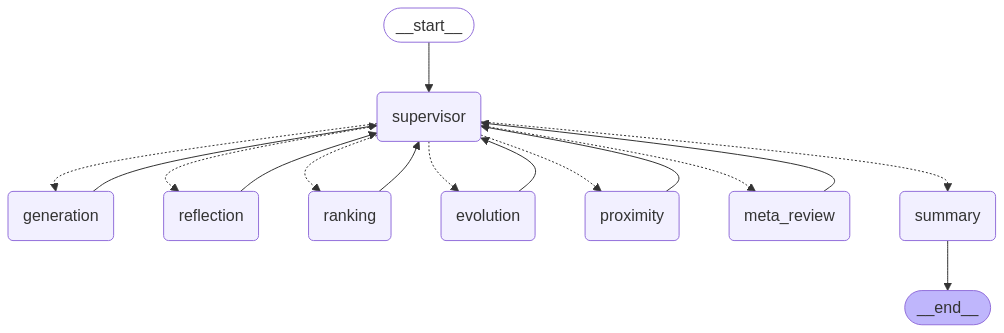

In [ ]:
from IPython.display import Image, display
import time
import requests

def display_graph_with_retry(graph, max_retries=3, retry_delay=2):
    """Displays the graph visualization with retry mechanism."""
    for attempt in range(max_retries):
        try:
            display(Image(graph.get_graph().draw_mermaid_png()))
            return
        except requests.exceptions.ReadTimeout as e:
            print(f"Attempt {attempt + 1} failed: {e}")
            if attempt < max_retries - 1:
                print(f"Retrying in {retry_delay} seconds...")
                time.sleep(retry_delay)
            else:
                print("Max retries reached. Giving up.")

display_graph_with_retry(graph, max_retries=3, retry_delay=10)

In [ ]:
def run_graph_with_cache_stats(query: str,logs=[]):
    """Run the graph and display cache statistics"""
    initial_cache_size = len(redis_client.keys("llm_cache:*"))

    result = graph.invoke({"query": query, "source_links": [], "evolution_links": []}, {"recursion_limit": 100})

    final_cache_size = len(redis_client.keys("llm_cache:*"))
    new_entries = final_cache_size - initial_cache_size

    # print(f"\n[CACHE STATS] Initial cache entries: {initial_cache_size}")
    # print(f"[CACHE STATS] New cache entries: {new_entries}")
    # print(f"[CACHE STATS] Total cache entries: {final_cache_size}")

    return result

# **TESTING and OUTPUT - Interface with Gradio**

In [ ]:
final_results = []
answer=run_graph_with_cache_stats(query="How can agentic AI apply common sense in unseen scenarios? Any approaches?")


[SUPERVISOR] Deciding next step...
[GENERATION] Processing query: how can agentic ai apply common sense in unseen scenarios? any approaches?
[RESULTS] 10 documents retrieved from web.
Refered Source links : ['https://blogs.sas.com/content/sascom/2025/03/24/beyond-the-black-box-how-agentic-ai-is-redefining-explainability/', 'https://medium.com/building-the-open-data-stack/a-guide-to-agentic-ai-architecture-c665f2ba30c2']
Hypothesis generated successfully!
**Low-Level Hypothesis:**  Agentic AI systems, characterized by autonomous decision-making and minimal human intervention, will require robust explainability mechanisms and architectural designs to mitigate risks and ensure responsible deployment, particularly in high-stakes applications.  This will involve advancements in model interpretability techniques and the development of secure, scalable infrastructure capable of handling real-time data processing and complex reasoning tasks.


**Refined Hypothesis Directions:**

1.  **Focus o

In [ ]:
answer['refined_hypothesis']

'**Refined Hypothesis:**\n\nAgentic AI systems, characterized by autonomous goal-pursuit and minimal human intervention, will exhibit a performance-explainability trade-off, particularly in unseen scenarios.  This trade-off is hypothesized to be inversely proportional; increased autonomy (and thus, potential for superior performance in novel situations) will correlate with decreased explainability.  This is because the complex decision-making processes enabling robust generalization in unseen scenarios often involve emergent behaviors and intricate interactions within the AI\'s internal model, making them difficult to dissect and interpret using current techniques.  The degree of this trade-off will vary depending on the specific architecture and training methodology of the agentic AI.  For example, reinforcement learning-based agents, while potentially achieving high performance, may be less explainable than agents trained with methods emphasizing transparency, such as symbolic reason

Recent Logs

query :

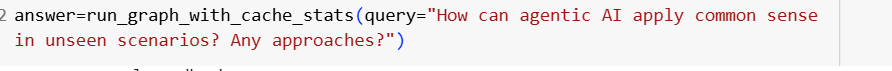

Output :      

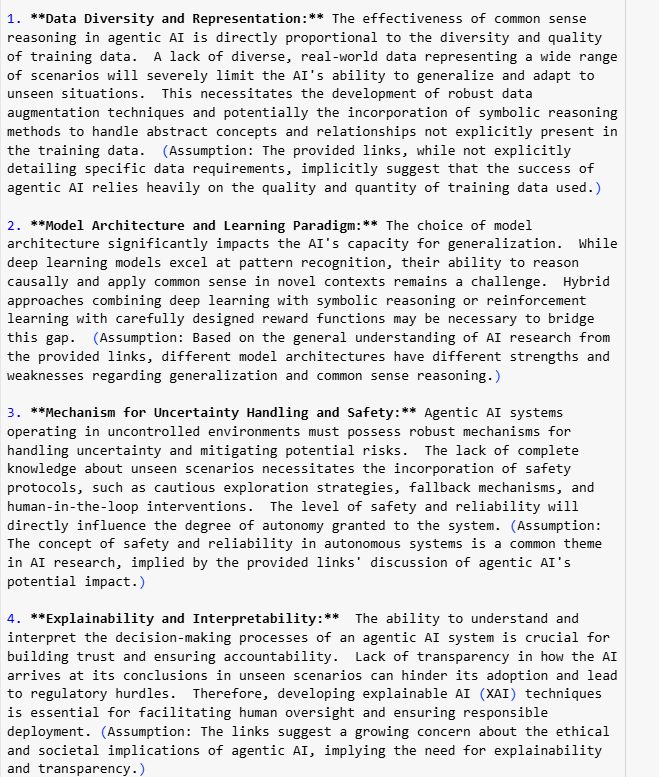

logs  :    

[SUPERVISOR] Deciding next step...
[GENERATION] Processing query: how can agentic ai apply common sense in unseen scenarios? any approaches?
[RESULTS] 39 documents retrieved from web.
Refered Source links : ['https://research.aimultiple.com/agentic-ai/', 'https://www.ibm.com/think/topics/agentic-reasoning']
Hypothesis generated successfully!
**Low-Level Hypothesis:**  Agentic AI systems, characterized by autonomous decision-making and proactive adaptation, will experience significant adoption across various sectors, but their implementation will be constrained by concerns regarding job displacement and the need for transparent decision-making processes.


This hypothesis can be refined by focusing on specific sectors (e.g., finance, healthcare), types of agentic AI (e.g., those using reinforcement learning vs. rule-based systems), or specific aspects of transparency (e.g., explainability, auditability).  Further research could investigate the trade-offs between autonomy and control, the development of ethical guidelines, and the societal impact of widespread agentic AI adoption.


Referred URLs for hypothesis generation: ['https://research.aimultiple.com/agentic-ai/', 'https://www.ibm.com/think/topics/agentic-reasoning']

[SUPERVISOR] Deciding next step...
[REFLECTION AGENT ] Started Processing
[REFLECTION AGENT] Feedback: yes

[SUPERVISOR] Deciding next step...
[RANKING AGENT] Started Processing
[RANKING] Parameters: Generalizability, Robustness, Explainability,  Efficiency, Safety
[RANKING AGENT] Score Assigned: 7

[SUPERVISOR] Deciding next step...
[EVOLUTION AGENT]  Started Processing
['https://research.aimultiple.com/agentic-ai/', 'https://www.ibm.com/think/topics/agentic-reasoning']

[SUPERVISOR] Deciding next step...
[PROXIMITY AGENT] Started Processing
[REDIS]Checking Cache for similar stored summaries...
[VECTOR DB]Checking Memory for similar stored summaries...
No relevant summary found. Fetching new data...
[PROXIMITY AGENT] Memory Aided Hypothesis: **Refined Hypothesis:**

The adoption of agentic AI, characterized by its autonomous goal-directed behavior and proactive adaptation (as defined in [1, 2]), will significantly impact various sectors, particularly finance and healthcare, within the next decade.  However, this adoption will be contingent upon addressing key challenges related to explainability and safety.  Specifically,  agentic AI systems relying on reinforcement learning (RL) will demonstrate greater adaptability in unseen scenarios than rule-based systems, but their inherent "black box" nature will necessitate the development and implementation of robust explainability techniques (e.g., model-agnostic interpretability methods) to ensure transparency and accountability [Assumption 1:  The provided links implicitly suggest RL-based systems are more prevalent in agentic AI research].  Furthermore, the potential for unintended consequences stemming from autonomous decision-making requires the development of verifiable safety mechanisms and ethical guidelines, focusing on both pre-deployment testing (e.g., simulation-based validation) and post-deployment monitoring (e.g., continuous performance evaluation and human-in-the-loop oversight) [Assumption 2:  The emphasis on autonomy in the provided links implies a need for safety and ethical considerations].  The rate of adoption will be directly correlated with the successful mitigation of these challenges, measured by metrics such as the level of explainability achieved, the frequency of unintended consequences, and the public's trust in the technology.  Failure to address these challenges will result in slower adoption and potential regulatory hurdles.


**Assumptions:**

* **Assumption 1:** The provided links implicitly suggest reinforcement learning (RL)-based systems are more prevalent in agentic AI research and development compared to rule-based systems, justifying the focus on RL in the refined hypothesis.
* **Assumption 2:** The emphasis on autonomy and proactive adaptation in the definition of agentic AI in the provided links implies a need for robust safety and ethical considerations, which are explicitly addressed in the refined hypothesis.


**References:**

[1] https://research.aimultiple.com/agentic-ai/
[2] https://www.ibm.com/think/topics/agentic-reasoning


This refined hypothesis is more specific, actionable, and logically structured. It identifies key challenges, proposes potential solutions, and suggests measurable metrics for evaluating the success of agentic AI adoption.  It also explicitly acknowledges the assumptions made based on the provided links.

[SUPERVISOR] Deciding next step...
[GENERATION] Processing query: how can agentic ai apply common sense in unseen scenarios? any approaches?
[RESULTS] 49 documents retrieved from web.
Refered Source links : ['https://research.aimultiple.com/agentic-ai/', 'https://www.ibm.com/think/topics/agentic-reasoning', 'https://www.researchgate.net/publication/370067765_How_to_Formulate_a_Good_Hypothesis', 'https://www.simplypsychology.org/what-is-a-hypothesis.html']
Hypothesis generated successfully!
**Low-Level Hypothesis:**  Agentic AI systems, characterized by their autonomous decision-making capabilities and proactive behavior, will demonstrate improved efficiency and effectiveness across diverse application domains compared to traditional reactive AI systems, but will also present novel challenges related to ethical considerations, accountability, and job displacement.


This hypothesis can be refined by:

* **Specificity of Domains:**  Instead of "diverse application domains," specify particular sectors (e.g., healthcare, finance, manufacturing) and define measurable metrics for "improved efficiency and effectiveness."
* **Types of Challenges:**  Elaborate on the ethical considerations (e.g., bias, transparency), accountability mechanisms (e.g., audit trails, explainable AI), and types of job displacement (e.g., automation of specific tasks vs. entire roles).
* **Comparative Analysis:**  Clearly define the characteristics of "traditional reactive AI systems" used as a benchmark for comparison.
* **Data Sources:**  Specify the data sources (from the provided JSON) that will be used to support or refute the hypothesis.


['https://www.researchgate.net/publication/370067765_How_to_Formulate_a_Good_Hypothesis', 'https://www.simplypsychology.org/what-is-a-hypothesis.html']

[SUPERVISOR] Deciding next step...
[REFLECTION AGENT ] Started Processing
[REFLECTION AGENT] Feedback: no

[SUPERVISOR] Deciding next step...
[GENERATION] Processing query: how can agentic ai apply common sense in unseen scenarios? any approaches?
[RESULTS] 59 documents retrieved from web.
Refered Source links : ['https://research.aimultiple.com/agentic-ai/', 'https://www.ibm.com/think/topics/agentic-reasoning', 'https://www.researchgate.net/publication/370067765_How_to_Formulate_a_Good_Hypothesis', 'https://www.simplypsychology.org/what-is-a-hypothesis.html', 'https://research.aimultiple.com/agentic-ai/', 'https://www.ibm.com/think/topics/agentic-reasoning']
Hypothesis generated successfully!
**Low-Level Hypothesis:**  Agentic AI systems, due to their autonomous decision-making capabilities, will exhibit a statistically significant increase in efficiency and productivity compared to traditional human-driven processes in at least one specific application domain (e.g., supply chain optimization, financial trading) within the next three years, but this increase will be accompanied by a measurable increase in the complexity of auditing and ensuring ethical behavior.


This hypothesis is low-level because it focuses on a measurable outcome (efficiency/productivity increase) within a defined timeframe and scope (specific application domain, three years).  It also acknowledges a potential negative consequence (increased audit complexity), making it more robust for further refinement.  Further research could refine this by:

* **Specifying the application domain:** Instead of "at least one," choose a specific area like supply chain management or financial trading.
* **Defining metrics:**  Precisely define how "efficiency" and "productivity" will be measured (e.g., reduction in costs, increase in throughput, improved accuracy).
* **Quantifying the increase:** Instead of "statistically significant," specify a target percentage increase.
* **Defining "measurable increase in complexity":**  This could be measured by the time taken for audits, the number of errors detected, or the cost of implementing auditing systems.


Referred URLs for hypothesis generation: ['https://research.aimultiple.com/agentic-ai/', 'https://www.ibm.com/think/topics/agentic-reasoning']

[SUPERVISOR] Deciding next step...
[REFLECTION AGENT ] Started Processing
[REFLECTION AGENT] Feedback: no

[SUPERVISOR] Deciding next step...
[GENERATION] Processing query: how can agentic ai apply common sense in unseen scenarios? any approaches?
[RESULTS] 69 documents retrieved from web.
Refered Source links : ['https://research.aimultiple.com/agentic-ai/', 'https://www.ibm.com/think/topics/agentic-reasoning', 'https://www.researchgate.net/publication/370067765_How_to_Formulate_a_Good_Hypothesis', 'https://www.simplypsychology.org/what-is-a-hypothesis.html', 'https://research.aimultiple.com/agentic-ai/', 'https://www.ibm.com/think/topics/agentic-reasoning', 'https://www.forbes.com/councils/forbestechcouncil/2025/01/03/agentic-ai-a-new-paradigm-in-autonomous-artificial-intelligence/', 'https://hbr.org/2024/12/what-is-agentic-ai-and-how-will-it-change-work']
Hypothesis generated successfully!
Low-Level Hypothesis:  Agentic AI systems, characterized by autonomous decision-making and environmental adaptation, will exhibit a trade-off between increased efficiency/productivity in specific tasks and the emergence of unforeseen challenges related to transparency, accountability, and potential job displacement.  This trade-off will vary depending on the specific application and the level of human oversight implemented.


Refined Hypothesis Possibilities:

* **Focus on Transparency:** The level of transparency in agentic AI decision-making processes will directly correlate with the level of public acceptance and regulatory oversight.  Higher transparency will mitigate concerns about job displacement and ethical implications, but may come at the cost of reduced efficiency.
* **Focus on Job Displacement:** The extent of job displacement caused by agentic AI will be directly proportional to the ease with which agentic AI can be deployed in various sectors and inversely proportional to the investment in retraining and upskilling programs.
* **Focus on Efficiency vs. Control:**  The efficiency gains achieved through agentic AI will be inversely proportional to the level of human control required to ensure safety and ethical considerations.  Greater efficiency may necessitate reduced human oversight, increasing the risk of unintended consequences.


Referred URLs (for hypothesis generation): ['https://www.forbes.com/councils/forbestechcouncil/2025/01/03/agentic-ai-a-new-paradigm-in-autonomous-artificial-intelligence/', 'https://hbr.org/2024/12/what-is-agentic-ai-and-how-will-it-change-work']

[SUPERVISOR] Deciding next step...
[REFLECTION AGENT ] Started Processing
[REFLECTION AGENT] Feedback: yes

[SUPERVISOR] Deciding next step...
[RANKING AGENT] Started Processing
[RANKING] Parameters: Generalizability, Robustness, Explainability,  Efficiency, Safety
[RANKING AGENT] Score Assigned: 7

[SUPERVISOR] Deciding next step...
[EVOLUTION AGENT]  Started Processing
['https://research.aimultiple.com/agentic-ai/', 'https://www.ibm.com/think/topics/agentic-reasoning', 'https://www.forbes.com/councils/forbestechcouncil/2025/01/03/agentic-ai-a-new-paradigm-in-autonomous-artificial-intelligence/', 'https://hbr.org/2024/12/what-is-agentic-ai-and-how-will-it-change-work']

[SUPERVISOR] Deciding next step...
[PROXIMITY AGENT] Started Processing
[REDIS]Checking Cache for similar stored summaries...
[VECTOR DB]Checking Memory for similar stored summaries...
No relevant summary found. Fetching new data...
[PROXIMITY AGENT] Memory Aided Hypothesis: **Refined Hypothesis:**

Agentic AI's ability to apply common sense in unseen scenarios hinges on its capacity for robust generalization and adaptation, a capability currently limited by existing techniques.  While agentic AI promises increased efficiency and productivity by autonomously achieving goals in dynamic environments, its success in applying common sense reasoning to novel situations depends critically on several intertwined factors:

1. **Data Diversity and Representation:** The effectiveness of common sense reasoning in agentic AI is directly proportional to the diversity and quality of training data.  A lack of diverse, real-world data representing a wide range of scenarios will severely limit the AI's ability to generalize and adapt to unseen situations.  This necessitates the development of robust data augmentation techniques and potentially the incorporation of symbolic reasoning methods to handle abstract concepts and relationships not explicitly present in the training data.  (Assumption: The provided links, while not explicitly detailing specific data requirements, implicitly suggest that the success of agentic AI relies heavily on the quality and quantity of training data used.)

2. **Model Architecture and Learning Paradigm:** The choice of model architecture significantly impacts the AI's capacity for generalization.  While deep learning models excel at pattern recognition, their ability to reason causally and apply common sense in novel contexts remains a challenge.  Hybrid approaches combining deep learning with symbolic reasoning or reinforcement learning with carefully designed reward functions may be necessary to bridge this gap.  (Assumption: Based on the general understanding of AI research from the provided links, different model architectures have different strengths and weaknesses regarding generalization and common sense reasoning.)

3. **Mechanism for Uncertainty Handling and Safety:** Agentic AI systems operating in uncontrolled environments must possess robust mechanisms for handling uncertainty and mitigating potential risks.  The lack of complete knowledge about unseen scenarios necessitates the incorporation of safety protocols, such as cautious exploration strategies, fallback mechanisms, and human-in-the-loop interventions.  The level of safety and reliability will directly influence the degree of autonomy granted to the system. (Assumption:  The concept of safety and reliability in autonomous systems is a common theme in AI research, implied by the provided links' discussion of agentic AI's potential impact.)

4. **Explainability and Interpretability:**  The ability to understand and interpret the decision-making processes of an agentic AI system is crucial for building trust and ensuring accountability.  Lack of transparency in how the AI arrives at its conclusions in unseen scenarios can hinder its adoption and lead to regulatory hurdles.  Therefore, developing explainable AI (XAI) techniques is essential for facilitating human oversight and ensuring responsible deployment. (Assumption: The links suggest a growing concern about the ethical and societal implications of agentic AI, implying the need for explainability and transparency.)


In summary, while agentic AI holds immense potential for improving efficiency and productivity, its ability to apply common sense in unseen scenarios is not guaranteed.  Success will depend on addressing the challenges related to data representation, model architecture, safety mechanisms, and explainability.  Further research and development are needed to overcome these limitations and unlock the full potential of agentic AI.

[SUPERVISOR] Deciding next step...
[CLEAN UP AGENT] Processing
Forwarding output
[CLEAN UP AGENT] Processing
Forwarding output

In [ ]:
answer['evolution_links'] + answer['source_links']

['https://www.forbes.com/councils/forbestechcouncil/2025/01/03/agentic-ai-a-new-paradigm-in-autonomous-artificial-intelligence/',
 'https://blogs.sas.com/content/sascom/2025/03/24/beyond-the-black-box-how-agentic-ai-is-redefining-explainability/',
 'https://blogs.sas.com/content/sascom/2025/03/24/beyond-the-black-box-how-agentic-ai-is-redefining-explainability/',
 'https://medium.com/building-the-open-data-stack/a-guide-to-agentic-ai-architecture-c665f2ba30c2',
 'https://blogs.sas.com/content/sascom/2025/03/24/beyond-the-black-box-how-agentic-ai-is-redefining-explainability/',
 'https://medium.com/building-the-open-data-stack/a-guide-to-agentic-ai-architecture-c665f2ba30c2',
 'https://blogs.sas.com/content/sascom/2025/03/24/beyond-the-black-box-how-agentic-ai-is-redefining-explainability/',
 'https://medium.com/building-the-open-data-stack/a-guide-to-agentic-ai-architecture-c665f2ba30c2',
 'https://www.forbes.com/councils/forbestechcouncil/2025/01/03/agentic-ai-a-new-paradigm-in-autono

In [ ]:
!pip install gradio -q

In [ ]:
answer

{'query': 'how can agentic ai apply common sense in unseen scenarios? any approaches?',
 'hypothesis': "**Low-Level Hypothesis:**  Agentic AI systems, characterized by autonomous goal-pursuit and minimal human intervention, will exhibit a trade-off between performance and explainability, necessitating the development of novel interpretability techniques and robust governance frameworks to ensure responsible deployment.\n\n\nThis hypothesis focuses on a core tension revealed in the data: the inherent difficulty in making highly autonomous AI systems transparent and understandable.  It can be refined by:\n\n* **Quantifying the trade-off:**  Defining metrics for performance and explainability to allow for empirical testing.\n* **Specifying interpretability techniques:**  Focusing on specific methods (e.g., counterfactual analysis, SHAP values) and evaluating their effectiveness in different Agentic AI contexts.\n* **Detailing governance frameworks:**  Exploring specific regulatory or ethi

# **UI**

In [ ]:
answer['evolution_links']+answer['source_links']

['https://www.forbes.com/councils/forbestechcouncil/2025/01/03/agentic-ai-a-new-paradigm-in-autonomous-artificial-intelligence/',
 'https://blogs.sas.com/content/sascom/2025/03/24/beyond-the-black-box-how-agentic-ai-is-redefining-explainability/',
 'https://blogs.sas.com/content/sascom/2025/03/24/beyond-the-black-box-how-agentic-ai-is-redefining-explainability/',
 'https://medium.com/building-the-open-data-stack/a-guide-to-agentic-ai-architecture-c665f2ba30c2',
 'https://blogs.sas.com/content/sascom/2025/03/24/beyond-the-black-box-how-agentic-ai-is-redefining-explainability/',
 'https://medium.com/building-the-open-data-stack/a-guide-to-agentic-ai-architecture-c665f2ba30c2',
 'https://blogs.sas.com/content/sascom/2025/03/24/beyond-the-black-box-how-agentic-ai-is-redefining-explainability/',
 'https://medium.com/building-the-open-data-stack/a-guide-to-agentic-ai-architecture-c665f2ba30c2',
 'https://www.forbes.com/councils/forbestechcouncil/2025/01/03/agentic-ai-a-new-paradigm-in-autono

In [ ]:
!pip install gradio -q

In [ ]:
import gradio as gr

In [ ]:
def predict(message, history):
    answer = run_graph_with_cache_stats(message)
    logs_list = answer.get("logs", [])
    output = answer.get("refined_hypothesis", "No output available")
    sources = "\n".join(answer.get("source_links", []) + answer.get("evolution_links", [])) or "No sources available"

    history.append((message, output))
    logs = ""

    for log in logs_list:
        logs += log + "\n"
        time.sleep(0.5)  # Simulating streaming delay
        yield history, gr.update(value=logs.strip()), "Processing..."

    yield history, gr.update(value=logs.strip()), sources

with gr.Blocks() as demo:
    gr.Markdown("# SECOND MIND")

    with gr.Row():
        chatbot = gr.Chatbot(label="Chat")

    with gr.Row():
        query_input = gr.Textbox(label="Enter your query")
        submit_btn = gr.Button("Submit")

    with gr.Row():
        logs_output = gr.Textbox(label="Logs", interactive=False)

    with gr.Row():
        sources_section = gr.Textbox(label="Sources", interactive=False)

    submit_btn.click(predict, inputs=[query_input, chatbot], outputs=[chatbot, logs_output, sources_section])

demo.launch(share=True, debug=True)


<ipython-input-47-b2ec53bab48e>:21: UserWarning: You have not specified a value for the `type` parameter. Defaulting to the 'tuples' format for chatbot messages, but this is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style dictionaries with 'role' and 'content' keys.
  chatbot = gr.Chatbot(label="Chat")


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://d5fdd9256ef623bd4a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Refered Source links : ['https://www.sapien.io/blog/reducing-hallucinations-in-llms', 'https://datadriveninsights.io/6-ways-to-prevent-hallucinations-in-llms/', 'https://www.turing.com/resources/minimize-llm-hallucinations-strategy', 'https://medium.com/@gcentulani/understanding-hallucination-in-llms-causes-consequences-and-mitigation-strategies-b5e1d0268069', 'https://magnimindacademy.com/blog/how-to-reduce-llm-hallucinations-with-agentic-ai-simple-techniques-for-making-large-language-models-more-reliable/']
Hypothesis generated successfully!
**Low-Level Hypothesis:**  Agentic AI systems, while exhibiting increased autonomy and decision-making capabilities, are susceptible to errors stemming from underlying Large Language Model (LLM) limitations, specifically hallucinations, impacting the reliability and trustworthiness of their actions.  This necessitates the development of robust mechanisms for detecting and mitigating these hallucinations to ensure safe and responsible deployment o